In [1]:
import pandas as pd
import numpy as np

### 1. Series

 Series is a one-dimensional array-like object containing a sequence of values (of
 similar types to NumPy types) of the same type and an associated array of data labels,
 called its index. The simplest Series is formed from only an array of data:

In [2]:
# for example
# simple array from only array of data
a = pd.Series([4, 5, 6, 7])
a

0    4
1    5
2    6
3    7
dtype: int64

In [3]:
b = pd.Series(['ONANA', 'MARTINEZ', 'MAGUIRE', 'YORO'])
b

0       ONANA
1    MARTINEZ
2     MAGUIRE
3        YORO
dtype: object

In [4]:
# Array representation and index object of a series
print('Array representation:')
print(a.array)

print('\nindex object:')
print(a.index)

Array representation:
<NumpyExtensionArray>
[4, 5, 6, 7]
Length: 4, dtype: int64

index object:
RangeIndex(start=0, stop=4, step=1)


In [5]:
# Creatina a series with specific index
c = pd.Series(['ONANA', 'MARTINEZ', 'RODRI', 'MESSI'], index = ['GK', 'CB', 'MF', 'CF'])
c

GK       ONANA
CB    MARTINEZ
MF       RODRI
CF       MESSI
dtype: object

In [6]:
# accessing the index
c.index

Index(['GK', 'CB', 'MF', 'CF'], dtype='object')

In [7]:
# accessing the values through index
print(f"The CB is: {c['CB']}")     # output: MARTINEZ
print(f"The CF is: {c['CF']}")   # output: MESSI 

# accessing multiple values
print(c[['GK', 'MF']])

The CB is: MARTINEZ
The CF is: MESSI
GK    ONANA
MF    RODRI
dtype: object


In [8]:
# numpy operations
# recall a = pd.Series([4, 5, 6, 7])

a[a>5]

2    6
3    7
dtype: int64

In [9]:
a * 4

0    16
1    20
2    24
3    28
dtype: int64

In [10]:
# applying numpy like functions preserve the index-value link
np.exp(a)

0      54.598150
1     148.413159
2     403.428793
3    1096.633158
dtype: float64

In [11]:
# recall c = pd.Series(['ONANA', 'MARTINEZ', 'RODRI', 'MESSI'], index = ['GK', 'CB', 'MF', 'CF'])
# another way to think about a series is a fixed length, ordered dictionary

print('CB' in c)     # True 
print('RW' in c)     # False

True
False


In [12]:
# We can create Series from python dictionariy
d_data = {'Africa': 35000, 'Asia': 71000, 'North America': 16000, 'South America': 32000, 'Europe': 24000, 'Australia': 9000}
s_data = pd.Series(d_data)
s_data

Africa           35000
Asia             71000
North America    16000
South America    32000
Europe           24000
Australia         9000
dtype: int64

In [13]:
# A sreries can be converted back to a dictionary with its to_dict method
s_data.to_dict()

{'Africa': 35000,
 'Asia': 71000,
 'North America': 16000,
 'South America': 32000,
 'Europe': 24000,
 'Australia': 9000}

In [14]:
# As we pass the dictionary to the series it will adopt the order of the keys in the dictionary
# We can override by passing index argument

continents = ['Asia', 'Africa', 'South America', 'Europe', 'North America', 'Antartica']
sdata = pd.Series(d_data, index = continents)
sdata

Asia             71000.0
Africa           35000.0
South America    32000.0
Europe           24000.0
North America    16000.0
Antartica            NaN
dtype: float64

In [15]:
# in the above example since Antartica  has no value is responds with NaN
# Since we exclude Australia from the index it is excluded from the series
# The isna() and notna() functions in pandas should be used to detect missing data
pd.isna(sdata)

Asia             False
Africa           False
South America    False
Europe           False
North America    False
Antartica         True
dtype: bool

In [16]:
pd.notna(sdata)

Asia              True
Africa            True
South America     True
Europe            True
North America     True
Antartica        False
dtype: bool

In [17]:
# series also has these functions
sdata.isna()

Asia             False
Africa           False
South America    False
Europe           False
North America    False
Antartica         True
dtype: bool

In [18]:
# A useful Series feature for many applications is that it automatically aligns by index
# label in arithmetic operations:
print('s_data:')
print(s_data)
print('\n\nsdata')
print(sdata)

s_data:
Africa           35000
Asia             71000
North America    16000
South America    32000
Europe           24000
Australia         9000
dtype: int64


sdata
Asia             71000.0
Africa           35000.0
South America    32000.0
Europe           24000.0
North America    16000.0
Antartica            NaN
dtype: float64


In [19]:
s_data + sdata

Africa            70000.0
Antartica             NaN
Asia             142000.0
Australia             NaN
Europe            48000.0
North America     32000.0
South America     64000.0
dtype: float64

In [20]:
# Both the Series object itself and its index have a name attribute, which integrates with
# other areas of pandas functionality:

sdata.name = 'Population'
sdata.index.name = 'Continents'
sdata

Continents
Asia             71000.0
Africa           35000.0
South America    32000.0
Europe           24000.0
North America    16000.0
Antartica            NaN
Name: Population, dtype: float64

In [21]:
# A Series’s index can be altered in place by assignment:
# Recall c = pd.Series(['ONANA', 'MARTINEZ', 'RODRI', 'MESSI'], index = ['GK', 'CB', 'DM', 'AMF'])
c

GK       ONANA
CB    MARTINEZ
MF       RODRI
CF       MESSI
dtype: object

In [22]:
# Alter the index
c.index = ['Cameron', 'Argentina', 'Spain', 'Argentina']
c

Cameron         ONANA
Argentina    MARTINEZ
Spain           RODRI
Argentina       MESSI
dtype: object

## 2. DataFrame

 A DataFrame represents a rectangular table of data and contains an ordered, named collection of columns, each of which can be a different value type (numeric, string, Boolean, etc.). The DataFrame has both a row and column index; it can be thought of as a dictionary of Series all sharing the same index.  

A DataFrame in pandas is a two-dimensional, size-mutable, and heterogeneous tabular data structure that you can think of as a  spreadsheet or SQL table in Python. Here are some key points about a DataFrame:

__Two-Dimensional Structure:__ It consists of rows and columns, making it a natural choice for representing tabular data.  
__Labeled Axes:__ Both the rows (index) and columns have labels. This makes it easy to access, slice, and manipulate data using these labels.  
__Heterogeneous Data Types:__ Each column in a DataFrame can hold data of a different type (e.g., integers, floats, strings, etc.), which is useful for real-  world data that often includes a variety of data types.  
__Size Mutability:__ You can easily add or remove columns and rows, making DataFrames highly flexible for data manipulation tasks.    
__Powerful Operations:__ DataFrames come with a wide range of built-in methods for data cleaning, transformation, aggregation, and visualization. They   support operations like merging, joining, reshaping, and handling missing data.  

In [23]:
# There are many ways to construct a DataFrame, though one of the most common is
# from a dictionary of equal-length lists or NumPy arrays:

data1 = {'Countries': ['India', 'India' ,'India', 'China', 'China', 'China'],
        'Year': [2000, 2010, 2020, 2000, 2010, 2020],
        'Population': [1041, 1224, 1380, 1265, 1343, 1402]}
d_frame = pd.DataFrame(data1, index = ['a', 'b', 'c', 'd', 'e', 'f'])
d_frame

,Countries,Year,Population
a,India,2000,1041
b,India,2010,1224
c,India,2020,1380
d,China,2000,1265
e,China,2010,1343
f,China,2020,1402


In [24]:
data = {
    'Year': [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020],
    'China': [400, 400, 430, 480, 500, 540, 660, 818, 987, 1143, 1265, 1343, 1402],
    'India': [250, 260, 280, 300, 320, 340, 450, 550, 700, 870, 1041, 1224, 1380],
    'USA': [76, 92, 106, 123, 132, 151, 179, 203, 227, 249, 282, 309, 331],
    'Indonesia': [40, 45, 50, 55, 60, 70, 90, 115, 150, 180, 210, 242, 273],
    'Pakistan': [30, 32, 35, 38, 40, 33, 70, 93, 106, 132, 146, 175, 220],
    'Brazil': [17, 20, 23, 28, 31, 41, 70, 95, 121, 149, 174, 195, 212],
    'Nigeria': [18, 19, 20, 22, 24, 27, 37, 56, 70, 95, 122, 158, 206],
    'Bangladesh': [30, 32, 35, 38, 42, 44, 50, 66, 84, 105, 130, 148, 164],
    'Russia': [40, 45, 50, 60, 70, 70, 80, 105, 125, 147, 146, 143, 146],
    'Mexico': [13, 14, 15, 18, 20, 27, 37, 50, 63, 82, 97, 112, 128],
    'Japan': [44, 50, 55, 64, 73, 83, 94, 104, 117, 123, 127, 128, 126],
    'Ethiopia': [16, 16.5, 17, 17.5, 18, 19, 22, 30, 42, 50, 66, 84, 115]
}
dframe = pd.DataFrame(data)
dframe

,Year,China,India,USA,Indonesia,Pakistan,Brazil,Nigeria,Bangladesh,Russia,Mexico,Japan,Ethiopia
0,1900,400,250,76,40,30,17,18,30,40,13,44,16.0
1,1910,400,260,92,45,32,20,19,32,45,14,50,16.5
2,1920,430,280,106,50,35,23,20,35,50,15,55,17.0
3,1930,480,300,123,55,38,28,22,38,60,18,64,17.5
4,1940,500,320,132,60,40,31,24,42,70,20,73,18.0
5,1950,540,340,151,70,33,41,27,44,70,27,83,19.0
6,1960,660,450,179,90,70,70,37,50,80,37,94,22.0
7,1970,818,550,203,115,93,95,56,66,105,50,104,30.0
8,1980,987,700,227,150,106,121,70,84,125,63,117,42.0
9,1990,1143,870,249,180,132,149,95,105,147,82,123,50.0


In [25]:
# we can set a column to index column in this case we use 'Year' column
df = pd.DataFrame(data).set_index('Year')
df

,China,India,USA,Indonesia,Pakistan,Brazil,Nigeria,Bangladesh,Russia,Mexico,Japan,Ethiopia
Year,,,,,,,,,,,,
1900,400,250,76,40,30,17,18,30,40,13,44,16.0
1910,400,260,92,45,32,20,19,32,45,14,50,16.5
1920,430,280,106,50,35,23,20,35,50,15,55,17.0
1930,480,300,123,55,38,28,22,38,60,18,64,17.5
1940,500,320,132,60,40,31,24,42,70,20,73,18.0
1950,540,340,151,70,33,41,27,44,70,27,83,19.0
1960,660,450,179,90,70,70,37,50,80,37,94,22.0
1970,818,550,203,115,93,95,56,66,105,50,104,30.0
1980,987,700,227,150,106,121,70,84,125,63,117,42.0


In [26]:
# The head method selects only the first five rows
dframe.head()

,Year,China,India,USA,Indonesia,Pakistan,Brazil,Nigeria,Bangladesh,Russia,Mexico,Japan,Ethiopia
0,1900,400,250,76,40,30,17,18,30,40,13,44,16.0
1,1910,400,260,92,45,32,20,19,32,45,14,50,16.5
2,1920,430,280,106,50,35,23,20,35,50,15,55,17.0
3,1930,480,300,123,55,38,28,22,38,60,18,64,17.5
4,1940,500,320,132,60,40,31,24,42,70,20,73,18.0


In [27]:
# Similarly tail method returns the last five rows
dframe.tail()

,Year,China,India,USA,Indonesia,Pakistan,Brazil,Nigeria,Bangladesh,Russia,Mexico,Japan,Ethiopia
8,1980,987,700,227,150,106,121,70,84,125,63,117,42.0
9,1990,1143,870,249,180,132,149,95,105,147,82,123,50.0
10,2000,1265,1041,282,210,146,174,122,130,146,97,127,66.0
11,2010,1343,1224,309,242,175,195,158,148,143,112,128,84.0
12,2020,1402,1380,331,273,220,212,206,164,146,128,126,115.0


In [28]:
# We can specify the sequence of the dataframes columns
clmn = ['Year','Ethiopia', 'Japan', 'Mexico', 'Russia', 'Bangladesh', 'Nigeria', 'Brazil', 'Pakistan', 'Indonesia', 'USA', 'India', 'China']
dframe2 = pd.DataFrame(data, columns = clmn)
dframe2

,Year,Ethiopia,Japan,Mexico,Russia,Bangladesh,Nigeria,Brazil,Pakistan,Indonesia,USA,India,China
0,1900,16.0,44,13,40,30,18,17,30,40,76,250,400
1,1910,16.5,50,14,45,32,19,20,32,45,92,260,400
2,1920,17.0,55,15,50,35,20,23,35,50,106,280,430
3,1930,17.5,64,18,60,38,22,28,38,55,123,300,480
4,1940,18.0,73,20,70,42,24,31,40,60,132,320,500
5,1950,19.0,83,27,70,44,27,41,33,70,151,340,540
6,1960,22.0,94,37,80,50,37,70,70,90,179,450,660
7,1970,30.0,104,50,105,66,56,95,93,115,203,550,818
8,1980,42.0,117,63,125,84,70,121,106,150,227,700,987
9,1990,50.0,123,82,147,105,95,149,132,180,249,870,1143


In [29]:
# if we pass a column that is not in the dictionary it will appear missing values
# For example let's pass 'UK' which is not in the dictionary
cn = ['Year', 'UK', 'Ethiopia', 'Japan', 'Mexico', 'Russia', 'Bangladesh', 'Nigeria', 'Brazil', 'Pakistan', 'Indonesia', 'USA', 'India', 'China']
dframe3 = pd.DataFrame(data, columns = cn)
dframe3

,Year,UK,Ethiopia,Japan,Mexico,Russia,Bangladesh,Nigeria,Brazil,Pakistan,Indonesia,USA,India,China
0,1900,NaN,16.0,44,13,40,30,18,17,30,40,76,250,400
1,1910,NaN,16.5,50,14,45,32,19,20,32,45,92,260,400
2,1920,NaN,17.0,55,15,50,35,20,23,35,50,106,280,430
3,1930,NaN,17.5,64,18,60,38,22,28,38,55,123,300,480
4,1940,NaN,18.0,73,20,70,42,24,31,40,60,132,320,500
5,1950,NaN,19.0,83,27,70,44,27,41,33,70,151,340,540
6,1960,NaN,22.0,94,37,80,50,37,70,70,90,179,450,660
7,1970,NaN,30.0,104,50,105,66,56,95,93,115,203,550,818
8,1980,NaN,42.0,117,63,125,84,70,121,106,150,227,700,987
9,1990,NaN,50.0,123,82,147,105,95,149,132,180,249,870,1143


In [30]:
# A column in a dataframe can be retrived as a series by dictionary like notion
dframe['Ethiopia']

0      16.0
1      16.5
2      17.0
3      17.5
4      18.0
5      19.0
6      22.0
7      30.0
8      42.0
9      50.0
10     66.0
11     84.0
12    115.0
Name: Ethiopia, dtype: float64

In [31]:
# Or using the dot attribute notation
df.India

Year
1900     250
1910     260
1920     280
1930     300
1940     320
1950     340
1960     450
1970     550
1980     700
1990     870
2000    1041
2010    1224
2020    1380
Name: India, dtype: int64

In [32]:
# Rows can also be retrieved by position or name with the special iloc and loc attributes 
dframe.loc[1]

Year          1910.0
China          400.0
India          260.0
USA             92.0
Indonesia       45.0
Pakistan        32.0
Brazil          20.0
Nigeria         19.0
Bangladesh      32.0
Russia          45.0
Mexico          14.0
Japan           50.0
Ethiopia        16.5
Name: 1, dtype: float64

In [33]:
dframe.iloc[5]

Year          1950.0
China          540.0
India          340.0
USA            151.0
Indonesia       70.0
Pakistan        33.0
Brazil          41.0
Nigeria         27.0
Bangladesh      44.0
Russia          70.0
Mexico          27.0
Japan           83.0
Ethiopia        19.0
Name: 5, dtype: float64

In [34]:
# Columns can be modified
dframe3['UK'] = 30
dframe3

,Year,UK,Ethiopia,Japan,Mexico,Russia,Bangladesh,Nigeria,Brazil,Pakistan,Indonesia,USA,India,China
0,1900,30,16.0,44,13,40,30,18,17,30,40,76,250,400
1,1910,30,16.5,50,14,45,32,19,20,32,45,92,260,400
2,1920,30,17.0,55,15,50,35,20,23,35,50,106,280,430
3,1930,30,17.5,64,18,60,38,22,28,38,55,123,300,480
4,1940,30,18.0,73,20,70,42,24,31,40,60,132,320,500
5,1950,30,19.0,83,27,70,44,27,41,33,70,151,340,540
6,1960,30,22.0,94,37,80,50,37,70,70,90,179,450,660
7,1970,30,30.0,104,50,105,66,56,95,93,115,203,550,818
8,1980,30,42.0,117,63,125,84,70,121,106,150,227,700,987
9,1990,30,50.0,123,82,147,105,95,149,132,180,249,870,1143


In [35]:
# We can assign arrays
dframe3['UK'] = np.arange(10, 140, 10)
dframe3

,Year,UK,Ethiopia,Japan,Mexico,Russia,Bangladesh,Nigeria,Brazil,Pakistan,Indonesia,USA,India,China
0,1900,10,16.0,44,13,40,30,18,17,30,40,76,250,400
1,1910,20,16.5,50,14,45,32,19,20,32,45,92,260,400
2,1920,30,17.0,55,15,50,35,20,23,35,50,106,280,430
3,1930,40,17.5,64,18,60,38,22,28,38,55,123,300,480
4,1940,50,18.0,73,20,70,42,24,31,40,60,132,320,500
5,1950,60,19.0,83,27,70,44,27,41,33,70,151,340,540
6,1960,70,22.0,94,37,80,50,37,70,70,90,179,450,660
7,1970,80,30.0,104,50,105,66,56,95,93,115,203,550,818
8,1980,90,42.0,117,63,125,84,70,121,106,150,227,700,987
9,1990,100,50.0,123,82,147,105,95,149,132,180,249,870,1143


In [36]:
# Assigning a column that doesn’t exist will create a new column. 
dframe3['France'] = 50
dframe3

,Year,UK,Ethiopia,Japan,Mexico,Russia,Bangladesh,Nigeria,Brazil,Pakistan,Indonesia,USA,India,China,France
0,1900,10,16.0,44,13,40,30,18,17,30,40,76,250,400,50
1,1910,20,16.5,50,14,45,32,19,20,32,45,92,260,400,50
2,1920,30,17.0,55,15,50,35,20,23,35,50,106,280,430,50
3,1930,40,17.5,64,18,60,38,22,28,38,55,123,300,480,50
4,1940,50,18.0,73,20,70,42,24,31,40,60,132,320,500,50
5,1950,60,19.0,83,27,70,44,27,41,33,70,151,340,540,50
6,1960,70,22.0,94,37,80,50,37,70,70,90,179,450,660,50
7,1970,80,30.0,104,50,105,66,56,95,93,115,203,550,818,50
8,1980,90,42.0,117,63,125,84,70,121,106,150,227,700,987,50
9,1990,100,50.0,123,82,147,105,95,149,132,180,249,870,1143,50


In [37]:
# The del keyword will delete columns like with a dictionary.
del dframe3['UK']
dframe3

,Year,Ethiopia,Japan,Mexico,Russia,Bangladesh,Nigeria,Brazil,Pakistan,Indonesia,USA,India,China,France
0,1900,16.0,44,13,40,30,18,17,30,40,76,250,400,50
1,1910,16.5,50,14,45,32,19,20,32,45,92,260,400,50
2,1920,17.0,55,15,50,35,20,23,35,50,106,280,430,50
3,1930,17.5,64,18,60,38,22,28,38,55,123,300,480,50
4,1940,18.0,73,20,70,42,24,31,40,60,132,320,500,50
5,1950,19.0,83,27,70,44,27,41,33,70,151,340,540,50
6,1960,22.0,94,37,80,50,37,70,70,90,179,450,660,50
7,1970,30.0,104,50,105,66,56,95,93,115,203,550,818,50
8,1980,42.0,117,63,125,84,70,121,106,150,227,700,987,50
9,1990,50.0,123,82,147,105,95,149,132,180,249,870,1143,50


In [38]:
# Another common form of data is a nested dictionary of dictionaries:
nested_data = {
    'China': {1900: 400, 1910: 400, 1920: 430, 1930: 480, 1940: 500, 1950: 540, 1960: 660, 1970: 818, 1980: 987, 1990: 1143, 2000: 1265, 2010: 1343, 2020: 1402},
    'India': {1900: 250, 1910: 260, 1920: 280, 1930: 300, 1940: 320, 1950: 340, 1960: 450, 1970: 550, 1980: 700, 1990: 870, 2000: 1041, 2010: 1224, 2020: 1380},
    'United States': {1900: 76, 1910: 92, 1920: 106, 1930: 123, 1940: 132, 1950: 151, 1960: 179, 1970: 203, 1980: 227, 1990: 249, 2000: 282, 2010: 309, 2020: 331},
    'Indonesia': {1900: 40, 1910: 45, 1920: 50, 1930: 55, 1940: 60, 1950: 70, 1960: 90, 1970: 115, 1980: 150, 1990: 180, 2000: 210, 2010: 242, 2020: 273},
    'Pakistan': {1900: 30, 1910: 32, 1920: 35, 1930: 38, 1940: 40, 1950: 33, 1960: 70, 1970: 93, 1980: 106, 1990: 132, 2000: 146, 2010: 175, 2020: 220},
    'Brazil': {1900: 17, 1910: 20, 1920: 23, 1930: 28, 1940: 31, 1950: 41, 1960: 70, 1970: 95, 1980: 121, 1990: 149, 2000: 174, 2010: 195, 2020: 212},
    'Nigeria': {1900: 18, 1910: 19, 1920: 20, 1930: 22, 1940: 24, 1950: 27, 1960: 37, 1970: 56, 1980: 70, 1990: 95, 2000: 122, 2010: 158, 2020: 206},
    'Bangladesh': {1900: 30, 1910: 32, 1920: 35, 1930: 38, 1940: 42, 1950: 44, 1960: 50, 1970: 66, 1980: 84, 1990: 105, 2000: 130, 2010: 148, 2020: 164},
    'Russia': {1900: 40, 1910: 45, 1920: 50, 1930: 60, 1940: 70, 1950: 70, 1960: 80, 1970: 105, 1980: 125, 1990: 147, 2000: 146, 2010: 143, 2020: 146},
    'Mexico': {1900: 13, 1910: 14, 1920: 15, 1930: 18, 1940: 20, 1950: 27, 1960: 37, 1970: 50, 1980: 63, 1990: 82, 2000: 97, 2010: 112, 2020: 128},
    'Japan': {1900: 44, 1910: 50, 1920: 55, 1930: 64, 1940: 73, 1950: 83, 1960: 94, 1970: 104, 1980: 117, 1990: 123, 2000: 127, 2010: 128, 2020: 126},
    'Ethiopia': {1900: 16, 1910: 16.5, 1920: 17, 1930: 17.5, 1940: 18, 1950: 19, 1960: 22, 1970: 30, 1980: 42, 1990: 50, 2000: 66, 2010: 84, 2020: 115}
}
# If the nested dictionary is passed to the DataFrame, pandas will interpret the outer
# dictionary keys as the columns, and the inner keys as the row indices:
dframe4 = pd.DataFrame(nested_data)
dframe4

,China,India,United States,Indonesia,Pakistan,Brazil,Nigeria,Bangladesh,Russia,Mexico,Japan,Ethiopia
1900,400,250,76,40,30,17,18,30,40,13,44,16.0
1910,400,260,92,45,32,20,19,32,45,14,50,16.5
1920,430,280,106,50,35,23,20,35,50,15,55,17.0
1930,480,300,123,55,38,28,22,38,60,18,64,17.5
1940,500,320,132,60,40,31,24,42,70,20,73,18.0
1950,540,340,151,70,33,41,27,44,70,27,83,19.0
1960,660,450,179,90,70,70,37,50,80,37,94,22.0
1970,818,550,203,115,93,95,56,66,105,50,104,30.0
1980,987,700,227,150,106,121,70,84,125,63,117,42.0
1990,1143,870,249,180,132,149,95,105,147,82,123,50.0


In [39]:
# You can transpose the DataFrame (swap rows and columns) with similar syntax to a NumPy array:
dframe4.T

,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
China,400.0,400.0,430.0,480.0,500.0,540.0,660.0,818.0,987.0,1143.0,1265.0,1343.0,1402.0
India,250.0,260.0,280.0,300.0,320.0,340.0,450.0,550.0,700.0,870.0,1041.0,1224.0,1380.0
United States,76.0,92.0,106.0,123.0,132.0,151.0,179.0,203.0,227.0,249.0,282.0,309.0,331.0
Indonesia,40.0,45.0,50.0,55.0,60.0,70.0,90.0,115.0,150.0,180.0,210.0,242.0,273.0
Pakistan,30.0,32.0,35.0,38.0,40.0,33.0,70.0,93.0,106.0,132.0,146.0,175.0,220.0
Brazil,17.0,20.0,23.0,28.0,31.0,41.0,70.0,95.0,121.0,149.0,174.0,195.0,212.0
Nigeria,18.0,19.0,20.0,22.0,24.0,27.0,37.0,56.0,70.0,95.0,122.0,158.0,206.0
Bangladesh,30.0,32.0,35.0,38.0,42.0,44.0,50.0,66.0,84.0,105.0,130.0,148.0,164.0
Russia,40.0,45.0,50.0,60.0,70.0,70.0,80.0,105.0,125.0,147.0,146.0,143.0,146.0
Mexico,13.0,14.0,15.0,18.0,20.0,27.0,37.0,50.0,63.0,82.0,97.0,112.0,128.0


In [40]:
# The keys in the inner dictionaries are combined to form the index in the result. 
# This isn’t true if an explicit index is specified:
i = [2020, 2010, 2000, 1990, 1980, 1970, 1960, 1950]
dframe5 = pd.DataFrame(nested_data, index = i)
dframe5

,China,India,United States,Indonesia,Pakistan,Brazil,Nigeria,Bangladesh,Russia,Mexico,Japan,Ethiopia
2020,1402,1380,331,273,220,212,206,164,146,128,126,115
2010,1343,1224,309,242,175,195,158,148,143,112,128,84
2000,1265,1041,282,210,146,174,122,130,146,97,127,66
1990,1143,870,249,180,132,149,95,105,147,82,123,50
1980,987,700,227,150,106,121,70,84,125,63,117,42
1970,818,550,203,115,93,95,56,66,105,50,104,30
1960,660,450,179,90,70,70,37,50,80,37,94,22
1950,540,340,151,70,33,41,27,44,70,27,83,19


In [41]:
# Dictionaries of Series are treated in much the same way:
pdata = {'China': pd.Series([400, 450, 500]),
         'India': pd.Series([345, 532, 453]),
         'USA': pd.Series([231, 124, 321])
        }
dframe5 = pd.DataFrame(pdata)
dframe5

,China,India,USA
0,400,345,231
1,450,532,124
2,500,453,321


### Possible data inputs to the DataFrame constructor

#### 1. 2D Array

In [42]:
# need to specify the columns parameter.
# Each one-dimensional arrays act as the row of the dataframe
arr = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])
df = pd.DataFrame(arr, columns = ['A', 'B', 'C'], index = ['tens', 'hundreds', 'thousands'])
df                 

,A,B,C
tens,10,20,30
hundreds,100,200,300
thousands,1000,2000,3000


#### 2. Dictionary of arrays, lists, or tuples

In [43]:
# Each key becomes a column, and the values (lists/arrays) become the data.
# Each sequence becomes a column in the DataFrame; all sequences must be the same length
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Los Angeles', 'Chicago']}
df = pd.DataFrame(data)
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago


#### 3. List of Dictionaries

In [44]:
# Each item becomes a row in the DataFrame; unions of dictionary keys or Series indexes
# become the DataFrame’s column labels
# Each dictionary represents a row, and keys are column
data = [
    {'Name': 'Alice', 'Age': 25},
    {'Name': 'Bob', 'Age': 30},
    {'Name': 'Charlie', 'Age': 35}
]

df = pd.DataFrame(data)
df

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35


#### 4. List of Lists or Tuples

In [45]:
# need to specify the columns parameter
data = [
    ['Alice', 25, 'New York'],
    ['Bob', 30, 'Los Angeles'],
    ['Charlie', 35, 'Chicago']
]

df = pd.DataFrame(data, columns=['Name', 'Age', 'City'])
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago


#### 5. Dictionary of Series

In [46]:
# Each value becomes a column; indexes from each Series are unioned together to form the
# result’s row index if no explicit index is passed
# Keys become column names, and each Series becomes a column.
data = {
    'Name': pd.Series(['Alice', 'Bob', 'Charlie'], index = ['employ1', 'employ2', 'employ3']),
    'Age': pd.Series([25, 30, 35], index = ['employ1', 'employ2', 'employ3'])
}

df = pd.DataFrame(data)
df

,Name,Age
employ1,Alice,25
employ2,Bob,30
employ3,Charlie,35


#### 6. Dictionary of Dictionaries

In [47]:
# The outer dictionary keys become the column names, and the inner dictionary keys become the index of the DataFrame.
# Any missing values are filled with NaN by default.
import pandas as pd

data = {
    'Math': {101: 85, 102: 90, 103: 78},
    'Science': {101: 92, 103: 88, 104: 75}
}

df = pd.DataFrame(data)
df

,Math,Science
101,85.0,92.0
102,90.0,NaN
103,78.0,88.0
104,NaN,75.0


#### 7. List of DataFrames

In [48]:
# Concatenate multiple DataFrames into a single DataFrame.
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

df = pd.concat([df1, df2], ignore_index=True)
df

,A,B
0,1,3
1,2,4
2,5,7
3,6,8


In [49]:
dframe4

,China,India,United States,Indonesia,Pakistan,Brazil,Nigeria,Bangladesh,Russia,Mexico,Japan,Ethiopia
1900,400,250,76,40,30,17,18,30,40,13,44,16.0
1910,400,260,92,45,32,20,19,32,45,14,50,16.5
1920,430,280,106,50,35,23,20,35,50,15,55,17.0
1930,480,300,123,55,38,28,22,38,60,18,64,17.5
1940,500,320,132,60,40,31,24,42,70,20,73,18.0
1950,540,340,151,70,33,41,27,44,70,27,83,19.0
1960,660,450,179,90,70,70,37,50,80,37,94,22.0
1970,818,550,203,115,93,95,56,66,105,50,104,30.0
1980,987,700,227,150,106,121,70,84,125,63,117,42.0
1990,1143,870,249,180,132,149,95,105,147,82,123,50.0


In [50]:
# If a DataFrame’s index and columns have their name attributes set, these will also be displayed:
dframe4.index.name = 'Year'
dframe4.columns.name = 'Country'
dframe4

Country,China,India,United States,Indonesia,Pakistan,Brazil,Nigeria,Bangladesh,Russia,Mexico,Japan,Ethiopia
Year,,,,,,,,,,,,
1900,400,250,76,40,30,17,18,30,40,13,44,16.0
1910,400,260,92,45,32,20,19,32,45,14,50,16.5
1920,430,280,106,50,35,23,20,35,50,15,55,17.0
1930,480,300,123,55,38,28,22,38,60,18,64,17.5
1940,500,320,132,60,40,31,24,42,70,20,73,18.0
1950,540,340,151,70,33,41,27,44,70,27,83,19.0
1960,660,450,179,90,70,70,37,50,80,37,94,22.0
1970,818,550,203,115,93,95,56,66,105,50,104,30.0
1980,987,700,227,150,106,121,70,84,125,63,117,42.0


In [51]:
# Unlike Series, DataFrame does not have a name attribute. 
# DataFrame’s to_numpy method returns the data contained in the DataFrame as a two-dimensional ndarray:
dframe4.to_numpy()

array([[ 400. ,  250. ,   76. ,   40. ,   30. ,   17. ,   18. ,   30. ,
          40. ,   13. ,   44. ,   16. ],
       [ 400. ,  260. ,   92. ,   45. ,   32. ,   20. ,   19. ,   32. ,
          45. ,   14. ,   50. ,   16.5],
       [ 430. ,  280. ,  106. ,   50. ,   35. ,   23. ,   20. ,   35. ,
          50. ,   15. ,   55. ,   17. ],
       [ 480. ,  300. ,  123. ,   55. ,   38. ,   28. ,   22. ,   38. ,
          60. ,   18. ,   64. ,   17.5],
       [ 500. ,  320. ,  132. ,   60. ,   40. ,   31. ,   24. ,   42. ,
          70. ,   20. ,   73. ,   18. ],
       [ 540. ,  340. ,  151. ,   70. ,   33. ,   41. ,   27. ,   44. ,
          70. ,   27. ,   83. ,   19. ],
       [ 660. ,  450. ,  179. ,   90. ,   70. ,   70. ,   37. ,   50. ,
          80. ,   37. ,   94. ,   22. ],
       [ 818. ,  550. ,  203. ,  115. ,   93. ,   95. ,   56. ,   66. ,
         105. ,   50. ,  104. ,   30. ],
       [ 987. ,  700. ,  227. ,  150. ,  106. ,  121. ,   70. ,   84. ,
         125. ,   63. , 

# Index Objects

pandas’s Index objects are responsible for holding the axis labels (including a Data  Frame’s column names) and other metadata (like the axis name or names). Any array  or other sequence of labels you use when constructing a Series or DataFrame is internally converted to an Index:

An Index object is an immutable array that labels the axes of a DataFrame or Series.   
It plays a crucial role in aligning data for operations like selection, alignment, and reshaping.

In [52]:
s = pd.Series(np.arange(3), index = ['A', 'B', 'C'])
i = s.index
i

Index(['A', 'B', 'C'], dtype='object')

In [53]:
# We can access index elements by slicing
i[1:]

Index(['B', 'C'], dtype='object')

In [54]:
# Index objects are immutable so we can't modify
# i[0] = 'D'      # Raise an error

In [55]:
lables = pd.Index(np.arange(11, 14))
lables

Index([11, 12, 13], dtype='int64')

In [56]:
# Let's create a series with these index
s2 = pd.Series([0.2, 0.6, 3], index = lables)
s2

11    0.2
12    0.6
13    3.0
dtype: float64

In [57]:
# Checking the index of a Series
s2.index is lables          # True

True

In [58]:
# Create a new DataFrame with index
# Set an index from colums data
df = pd.DataFrame({'Name': ['Alice', 'Bob'], 'Age': [25, 30]})
df = df.set_index('Name')
df

,Age
Name,
Alice,25
Bob,30


In [59]:
# Reset an index
df = df.reset_index()
df

,Name,Age
0,Alice,25
1,Bob,30


In [60]:
# Assign another index
df.index = ['Person 1', 'Person 2']
df

,Name,Age
Person 1,Alice,25
Person 2,Bob,30


In [61]:
# Accessing an index
df.index

Index(['Person 1', 'Person 2'], dtype='object')

In [62]:
#  In addition to being array-like, an Index also behaves like a fixed-size set
dframe4

Country,China,India,United States,Indonesia,Pakistan,Brazil,Nigeria,Bangladesh,Russia,Mexico,Japan,Ethiopia
Year,,,,,,,,,,,,
1900,400,250,76,40,30,17,18,30,40,13,44,16.0
1910,400,260,92,45,32,20,19,32,45,14,50,16.5
1920,430,280,106,50,35,23,20,35,50,15,55,17.0
1930,480,300,123,55,38,28,22,38,60,18,64,17.5
1940,500,320,132,60,40,31,24,42,70,20,73,18.0
1950,540,340,151,70,33,41,27,44,70,27,83,19.0
1960,660,450,179,90,70,70,37,50,80,37,94,22.0
1970,818,550,203,115,93,95,56,66,105,50,104,30.0
1980,987,700,227,150,106,121,70,84,125,63,117,42.0


In [63]:
# Accessing columns names
dframe4.columns

Index(['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Brazil',
       'Nigeria', 'Bangladesh', 'Russia', 'Mexico', 'Japan', 'Ethiopia'],
      dtype='object', name='Country')

In [64]:
# We can check if a specific column name is in the index
print('Germany' in dframe4.columns)   # False
print('Ethiopia' in dframe4.columns)  # True

False
True


In [65]:
# Accessing row lables
dframe4.index

Index([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010,
       2020],
      dtype='int64', name='Year')

In [66]:
# We can check if a spacific row index is in a row lables
print(1950 in dframe4.index)    # True
print(1890 in dframe4.index)    # False

True
False


In [67]:
# Unlike Python sets, a pandas Index can contain duplicate labels:
i = pd.Index(['A', 'B', 'A', 'C', 'B'])
i

Index(['A', 'B', 'A', 'C', 'B'], dtype='object')

In [68]:
# Selections with duplicate labels will select all occurrences of that label.
s = pd.Series([1, 2, 3, 4, 5], index = i)
s

A    1
B    2
A    3
C    4
B    5
dtype: int64

In [69]:
s['A']

A    1
A    3
dtype: int64

#### some of index properties and methods

In [70]:
# index.values: returns the underlying array of the index
# index.name: sets or gets the name of the index
# index.names: For MultiIndex, returns a list of index names.
# index.dtype: returns the data type of the index elements
# index.size: returns the number of the index elements
# indes.shape: returns the shape of the index
# index.nunique(): returns the number of unique elements


# index.append(): appends another index or array to the current indes
# index.insert(): insert a new element to a specific position
# index.delete(): deletes an element at a given position
# index.drop(): Drops specific labels from the index.
# index.is_unique: Checks if all elements are unique. 
# index.is_monotonic_increasing/decreasing: Checks if the index is sorted in increasing or decreasing order.
# index.duplicated(): Returns a boolean array indicating duplicate labels.
# index.get_loc(): Returns the integer location of a label.
# index.to_list(): Converts the index to a list.
# index.map(): Applies a function to each element of the index.
# index.intersection(): Finds the common elements between two indexes.
# index.union(): Combines two indexes, keeping unique elements
# index.difference(): Finds elements in one index that are not in another.
# index.sort_values(): Sorts the index values
# index.astype(): Changes the data type of the index

In [71]:
s

A    1
B    2
A    3
C    4
B    5
dtype: int64

# Essential Functionality

#### Reindexing
An important method on pandas objects is reindex, which means to create a new object with the values rearranged to align with the new index.

In [72]:
s = pd.Series([2.4, 5.7, 8.1, 14.8, 22.5], index = ['c', 'a', 'd', 'e', 'b'])
s

c     2.4
a     5.7
d     8.1
e    14.8
b    22.5
dtype: float64

In [73]:
# Calling reindex on this Series rearranges the data according to the new index,
# introducing missing values if any index values were not already present:
s1 = s.reindex(['a', 'b', 'c', 'd', 'e', 'f'])
s1

a     5.7
b    22.5
c     2.4
d     8.1
e    14.8
f     NaN
dtype: float64

In [74]:
s2 = pd.Series(['Red', 'Green', 'Blue'], index = [1, 3, 5])
s2

1      Red
3    Green
5     Blue
dtype: object

In [75]:
# filling or interpolate some values we can use methods like 'ffill'
s3 = s2.reindex(np.arange(1, 9), method = 'ffill')
s3

1      Red
2      Red
3    Green
4    Green
5     Blue
6     Blue
7     Blue
8     Blue
dtype: object

In [76]:
# With DataFrame, reindex can alter the (row) index, columns, or both. When passed
# only a sequence, it reindexes the rows in the result:
df = pd.DataFrame(np.array([[8, 5, 0], [1, 0, 0], [4, 5, 1]]), columns = ['Messi', 'Ronaldo', 'Neymar'], 
                  index = ["ballon d'or", 'World cup', 'UCL'])
df

,Messi,Ronaldo,Neymar
ballon d'or,8,5,0
World cup,1,0,0
UCL,4,5,1


In [77]:
# Reindexing the rows
i = ['World cup', 'UCL', "ballon d'or"]
df.reindex(index = i)

,Messi,Ronaldo,Neymar
World cup,1,0,0
UCL,4,5,1
ballon d'or,8,5,0


In [78]:
# Reindexing the columns
c = ['Neymar', 'Messi', 'Ronaldo']
df.reindex(columns = c)

,Neymar,Messi,Ronaldo
ballon d'or,0,8,5
World cup,0,1,0
UCL,1,4,5


In [79]:
# Reindexing both rows and columns
df.reindex(index = i, columns = c)

,Neymar,Messi,Ronaldo
World cup,0,1,0
UCL,1,4,5
ballon d'or,0,8,5


In [80]:
df

,Messi,Ronaldo,Neymar
ballon d'or,8,5,0
World cup,1,0,0
UCL,4,5,1


In [81]:
# reindexing using the loc operator
df.loc[["World cup", "UCL", "ballon d'or"], ["Neymar", "Ronaldo", "Messi"]]

,Neymar,Ronaldo,Messi
World cup,0,0,1
UCL,1,5,4
ballon d'or,0,5,8


#### Dropping Entries from an Axis

In [82]:
# Dropping one or more entries from an axis is simple using drop method
s = pd.Series(np.arange(5.), index = ['a', 'b', 'c', 'd', 'e'])
s

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [83]:
# lets drop c index and create a new series with out it
s_new = s.drop('c')
s_new

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [84]:
# drop both 'c' and 'd'
s.drop(['c', 'd'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [85]:
# With DataFrame, index values can be deleted from either axis.
df = pd.DataFrame([[21, 19, 13, 9], [12, 8, 14, 6], [3, 6, 0, 1], [6, 9, 2, 8]], 
                  columns = ['Manchester united', 'Liverpool', 'Arsenal', 'Manchester city'],
                  index = ['Premier League ', 'Fa Cup', 'UCL', 'EFL Cup']
                 )
df

,Manchester united,Liverpool,Arsenal,Manchester city
Premier League,21,19,13,9
Fa Cup,12,8,14,6
UCL,3,6,0,1
EFL Cup,6,9,2,8


In [86]:
# dropping row lables
df.drop(index = 'EFL Cup')

,Manchester united,Liverpool,Arsenal,Manchester city
Premier League,21,19,13,9
Fa Cup,12,8,14,6
UCL,3,6,0,1


In [87]:
# Dropping columns lables
df.drop(columns = 'Manchester city')

,Manchester united,Liverpool,Arsenal
Premier League,21,19,13
Fa Cup,12,8,14
UCL,3,6,0
EFL Cup,6,9,2


#### Indexing, Selection, and Filtering

#### 1. Indexing 

In [88]:
# Indexing refers to the process of accessing specific rows, columns, or elements from a 
# DataFrame or Series using labels or integer positions.
s = pd.Series(np.arange(5), index = ['a', 'b', 'c', 'd', 'e'])
s

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [89]:
# indexing using lables
s['c']     # 2

np.int64(2)

In [90]:
# indexing using integers iloc operator
s.iloc[3]

np.int64(3)

In [91]:
# slicing
s[2:4]    # or # s.iloc[2:4]

c    2
d    3
dtype: int64

In [92]:
# accessing multiple values
s[['b', 'a', 'd']]

b    1
a    0
d    3
dtype: int64

In [93]:
# accessing multiple values using iloc operator
s.iloc[[1, 3, 2]]

b    1
d    3
c    2
dtype: int64

In [94]:
# filtering values
s[s > 2]

d    3
e    4
dtype: int64

In [95]:
# But the preferred way to select index values by lables is with the special loc operator
s.loc['b']

np.int64(1)

In [96]:
s.loc[['b', 'c', 'e']]

b    1
c    2
e    4
dtype: int64

In [97]:
# slicing using loc operator
# it is different from normal python slicing in a way the endpoin is inclusive
s

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [98]:
s.loc['b':'d']

b    1
c    2
d    3
dtype: int64

In [99]:
#  The sliced part is view of the original
s.loc['b':'d'] = 10
s

a     0
b    10
c    10
d    10
e     4
dtype: int64

In [100]:
# Indexing into a DataFrame retrieves one or more columns either with a single value or sequence:
df

,Manchester united,Liverpool,Arsenal,Manchester city
Premier League,21,19,13,9
Fa Cup,12,8,14,6
UCL,3,6,0,1
EFL Cup,6,9,2,8


In [101]:
# indexing a single column
df['Manchester united']

Premier League     21
Fa Cup             12
UCL                 3
EFL Cup             6
Name: Manchester united, dtype: int64

In [102]:
# indexing multiple columns
df[['Liverpool', 'Manchester united']]

,Liverpool,Manchester united
Premier League,19,21
Fa Cup,8,12
UCL,6,3
EFL Cup,9,6


In [103]:
# Indexing like this has a few special cases. The first is slicing or selecting data with a
# Boolean array:
df[:2]

,Manchester united,Liverpool,Arsenal,Manchester city
Premier League,21,19,13,9
Fa Cup,12,8,14,6


In [104]:
df["Arsenal"] > 5

Premier League      True
Fa Cup              True
UCL                False
EFL Cup            False
Name: Arsenal, dtype: bool

In [105]:
df[df['Arsenal'] > 5]

,Manchester united,Liverpool,Arsenal,Manchester city
Premier League,21,19,13,9
Fa Cup,12,8,14,6


In [106]:
df

,Manchester united,Liverpool,Arsenal,Manchester city
Premier League,21,19,13,9
Fa Cup,12,8,14,6
UCL,3,6,0,1
EFL Cup,6,9,2,8


In [107]:
# Selection on DataFrame with loc and iloc
# loc for lable based indexing
# iloc for integer based indexing
# Selecting index using row lable
df.loc['UCL']

Manchester united    3
Liverpool            6
Arsenal              0
Manchester city      1
Name: UCL, dtype: int64

In [108]:
df

,Manchester united,Liverpool,Arsenal,Manchester city
Premier League,21,19,13,9
Fa Cup,12,8,14,6
UCL,3,6,0,1
EFL Cup,6,9,2,8


In [109]:
# Selecting multiple rows
df.loc[['Fa Cup', 'EFL Cup']]

,Manchester united,Liverpool,Arsenal,Manchester city
Fa Cup,12,8,14,6
EFL Cup,6,9,2,8


In [110]:
# combining both row and column selection in loc by separating the selections with a comma
df.loc['UCL', 'Liverpool']

np.int64(6)

In [111]:
df.loc['UCL', ['Manchester city', 'Arsenal']]

Manchester city    1
Arsenal            0
Name: UCL, dtype: int64

In [112]:
df

,Manchester united,Liverpool,Arsenal,Manchester city
Premier League,21,19,13,9
Fa Cup,12,8,14,6
UCL,3,6,0,1
EFL Cup,6,9,2,8


In [113]:
# we can select using iloc
df.iloc[2]    # selecting third row

Manchester united    3
Liverpool            6
Arsenal              0
Manchester city      1
Name: UCL, dtype: int64

In [114]:
# Selecting two or more rows
df.iloc[[1, 3]]

,Manchester united,Liverpool,Arsenal,Manchester city
Fa Cup,12,8,14,6
EFL Cup,6,9,2,8


In [115]:
# selecting a row and specific columns
df.iloc[2, [0, 1, 3]]

Manchester united    3
Liverpool            6
Manchester city      1
Name: UCL, dtype: int64

In [116]:
# select a sepecific rows and specific columns
df.iloc[[0, 2], [0, 1]]

,Manchester united,Liverpool
Premier League,21,19
UCL,3,6


In [117]:
#  Both indexing functions work with slices in addition to single labels or lists of labels:
df.loc['UCL', 'Arsenal']

np.int64(0)

In [118]:
df.iloc[:, :3][df['Arsenal'] > 5]

,Manchester united,Liverpool,Arsenal
Premier League,21,19,13
Fa Cup,12,8,14


In [119]:
# Boolean arrays can be used with loc but not iloc:
# df.loc[df.Liverpool < 10]
df[df['Liverpool'] < 10]

,Manchester united,Liverpool,Arsenal,Manchester city
Fa Cup,12,8,14,6
UCL,3,6,0,1
EFL Cup,6,9,2,8


In [120]:
# Indexing options with DataFrame
# df[column]:  Select single column or sequence of columns from the DataFrame; special case conveniences:
# Boolean array (filter rows), slice (slice rows), or Boolean DataFrame (set values based on some criterion)

# df.loc[rows]:  Select single row or subset of rows from the DataFrame by label
# df.loc[:, cols]: Select single column or subset of columns by label
# df.loc[rows, cols]: Select both row(s) and column(s) by label
# df.iloc[rows]: Select single row or subset of rows from the DataFrame by integer position
# df.iloc[:, cols]: Select single column or subset of columns by integer position
# df.iloc[rows, cols]:  Select both row(s) and column(s) by integer position
# df.at[row, col]: Select a single scalar value by row and column label
# df.iat[row, col]:  Select a single scalar value by row and column position (integers)
# reindex method:  Select either rows or columns by labels

In [121]:
df

,Manchester united,Liverpool,Arsenal,Manchester city
Premier League,21,19,13,9
Fa Cup,12,8,14,6
UCL,3,6,0,1
EFL Cup,6,9,2,8


In [122]:
df.at['UCL', 'Arsenal']

np.int64(0)

#### Arithmetic and Data Alignment

In [123]:
# pandas can make it much simpler to work with objects that have different indexes.
# For example, when we add objects, if any index pairs are not the same, the respective
# index in the result will be the union of the index pairs.
s1 = pd.Series([65.3, 32.5, 21.6, 43.7, -32.4], index = ['a', 'b', 'c', 'd', 'e'])
s2 = pd.Series([2.4, 4, 5.8,-2], index = ['b', 'd', 'f', 'h'])

In [124]:
s1

a    65.3
b    32.5
c    21.6
d    43.7
e   -32.4
dtype: float64

In [125]:
s2

b    2.4
d    4.0
f    5.8
h   -2.0
dtype: float64

In [126]:
s1 + s2

a     NaN
b    34.9
c     NaN
d    47.7
e     NaN
f     NaN
h     NaN
dtype: float64

In [127]:
# To avoid NaN values we fill NaN values with 0
s1.add(s2, fill_value = 0)

a    65.3
b    34.9
c    21.6
d    47.7
e   -32.4
f     5.8
h    -2.0
dtype: float64

In [128]:
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]}, index=['x', 'y'])
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]}, index=['y', 'z'])

In [129]:
df1

,A,B
x,1,3
y,2,4


In [130]:
df2

,A,B
y,5,7
z,6,8


In [131]:
df1 + df2

,A,B
x,NaN,NaN
y,7.0,11.0
z,NaN,NaN


In [132]:
df1.add(df2, fill_value = 0)

,A,B
x,1.0,3.0
y,7.0,11.0
z,6.0,8.0


In [133]:
# Arithmetic methods with fill values
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]}, index=['x', 'y'])
df2 = pd.DataFrame({'A': [5, 6], 'C': [7, 8]}, index=['y', 'z'])

In [134]:
df1

,A,B
x,1,3
y,2,4


In [135]:
df2

,A,C
y,5,7
z,6,8


In [136]:
df1.add(df2, fill_value= 0)

,A,B,C
x,1.0,3.0,NaN
y,7.0,4.0,7.0
z,6.0,NaN,8.0


In [137]:
# Since there are unmatched datas in the operation so it results in NaN
# we can fill NaN with 0
df1.add(df2, fill_value = 0).fillna(0)   # fill the NaN after operation with 0

,A,B,C
x,1.0,3.0,0.0
y,7.0,4.0,7.0
z,6.0,0.0,8.0


In [138]:
# Another flexible arithmetic methods
# add, radd:  Methods for addition (+)
# sub, rsub:  Methods for subtraction (-)
# div, rdiv: Methods for division (/)
# floordiv, rfloordiv:  Methods for floor division (//)
# mul, rmul:  Methods for multiplication (*)
# pow, rpow:  Methods for exponentiation (**)

In [139]:
# Operations between DataFrame and Series
df = pd.DataFrame(np.arange(12).reshape(4, 3), 
                  index = ['Arsenal', 'Liverpool', 'Man United', 'Man City'],
                  columns = ['UCL', 'Fa Cup', 'Premier League'])
s = pd.Series(np.arange(2, 5), index = ['UCL', 'Fa Cup', 'Premier League'])

In [140]:
df

,UCL,Fa Cup,Premier League
Arsenal,0,1,2
Liverpool,3,4,5
Man United,6,7,8
Man City,9,10,11


In [141]:
s

UCL               2
Fa Cup            3
Premier League    4
dtype: int64

In [142]:
# By default, arithmetic between DataFrame and Series matches the index of the Series
# on the columns of the DataFrame, broadcasting down the rows:
df + s

,UCL,Fa Cup,Premier League
Arsenal,2,4,6
Liverpool,5,7,9
Man United,8,10,12
Man City,11,13,15


In [143]:
df * s

,UCL,Fa Cup,Premier League
Arsenal,0,3,8
Liverpool,6,12,20
Man United,12,21,32
Man City,18,30,44


In [144]:
s2 = pd.Series(np.arange(10, 13), index = ['Premier League', 'EFL', 'UCL'])

In [145]:
df

,UCL,Fa Cup,Premier League
Arsenal,0,1,2
Liverpool,3,4,5
Man United,6,7,8
Man City,9,10,11


In [146]:
s2

Premier League    10
EFL               11
UCL               12
dtype: int64

In [147]:
df + s2    # We arr trying to broadcasting over the rows

,EFL,Fa Cup,Premier League,UCL
Arsenal,NaN,NaN,12.0,12.0
Liverpool,NaN,NaN,15.0,15.0
Man United,NaN,NaN,18.0,18.0
Man City,NaN,NaN,21.0,21.0


In [148]:
# If we want to instead broadcast over the columns, matching on the rows, we have to
# use one of the arithmetic methods and specify to match over the index.
s3 = pd.Series([2, 4, 1, 2], index = ['Arsenal', 'Man United', 'Liverpool', 'Man City'])

In [149]:
df

,UCL,Fa Cup,Premier League
Arsenal,0,1,2
Liverpool,3,4,5
Man United,6,7,8
Man City,9,10,11


In [150]:
s3

Arsenal       2
Man United    4
Liverpool     1
Man City      2
dtype: int64

In [151]:
# broadcast over the columns, matching on the rows
# The axis that you pass is the axis to match on. In this case we mean to match on the
# DataFrame’s row index (axis="index") and broadcast across the columns.
df.add(s3, axis = 'index')

,UCL,Fa Cup,Premier League
Arsenal,2,3,4
Liverpool,4,5,6
Man City,11,12,13
Man United,10,11,12


####  Function Application and Mapping

In [152]:
df = pd.DataFrame(np.random.randint(40, 100, size = (4, 3)),
                 index=['Test 1', 'Test 2', 'Test 3', 'Test 4'],
                 columns=['Math', 'Science', 'English'])
df

,Math,Science,English
Test 1,82,98,47
Test 2,80,66,84
Test 3,48,77,89
Test 4,99,45,56


In [153]:
# Element-wise exponent value 
np.exp(df)

,Math,Science,English
Test 1,4.093997e+35,3.637971e+42,2.581313e+20
Test 2,5.540622e+34,4.607187e+28,3.025077e+36
Test 3,7.016736e+20,2.758513e+33,4.489613e+38
Test 4,9.889030e+42,3.493427e+19,2.091659e+24


In [154]:
n = pd.Series([10, 15, 20, 25, 30])
n

0    10
1    15
2    20
3    25
4    30
dtype: int64

In [155]:
# Let's define custum function
def even_or_odd(x):
    if x % 2 == 0:
        return 'even'
    else:
        return 'odd'

In [156]:
# Now lets apply to the series 'n'
n.apply(even_or_odd)

0    even
1     odd
2    even
3     odd
4    even
dtype: object

In [157]:
# We can us lambda function
n.apply(lambda x: 'Even' if x % 2 == 0 else 'Odd')

0    Even
1     Odd
2    Even
3     Odd
4    Even
dtype: object

In [158]:
data = pd.DataFrame({
    'Math': [80, 90, 70],
    'Science': [85, 95, 75],
    'English': [78, 88, 82]
}, index=['Alice', 'Bob', 'Charlie'])

In [159]:
data

,Math,Science,English
Alice,80,85,78
Bob,90,95,88
Charlie,70,75,82


In [160]:
# let's define a function to find the avarage marks
# x is a row or column of the data frame
def average(x):
    return x.mean()

In [161]:
# to calculate the average for each students
data.apply(average, axis = 'columns')

Alice      81.000000
Bob        91.000000
Charlie    75.666667
dtype: float64

In [162]:
# to calculate average of the subjects
data.apply(average)

Math       80.000000
Science    85.000000
English    82.666667
dtype: float64

In [163]:
# for example lets apply the max function along both column-wise and row-wise
# Apply column-wise
df.apply(max)    # maximum data from each columns

Math       99
Science    98
English    89
dtype: int64

In [164]:
# using lambda function
data.apply(lambda x: x.mean(), axis = 1)

Alice      81.000000
Bob        91.000000
Charlie    75.666667
dtype: float64

In [165]:
data.apply(lambda x: x.mean())

Math       80.000000
Science    85.000000
English    82.666667
dtype: float64

In [166]:
data['Average'] = data.apply(lambda x: x.mean(), axis = 1)   # 'index' = 0 and 'columns' = 1

In [167]:
data

,Math,Science,English,Average
Alice,80,85,78,81.000000
Bob,90,95,88,91.000000
Charlie,70,75,82,75.666667


In [168]:
# If we want to apply row-wise we pass 'axis = "columns"'
data.apply(max, axis = 'columns')

Alice      85.0
Bob        95.0
Charlie    82.0
dtype: float64

In [169]:
# Many of the most common array statistics (like sum and mean) are DataFrame methods, so using apply is not necessary.
data.sum(axis = "columns")

Alice      324.000000
Bob        364.000000
Charlie    302.666667
dtype: float64

In [170]:
# General Example
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})
df

,A,B
0,1,4
1,2,5
2,3,6


In [171]:
# Apply method on dataframe
df.apply(sum)    # sum of each column

A     6
B    15
dtype: int64

In [172]:
df.apply(sum, axis = 'columns')   # sum of each rows

0    5
1    7
2    9
dtype: int64

In [173]:
print(df.apply(np.mean))                    # mean of each columns
print(df.apply(np.mean, axis = 'columns'))  # mean of each rows

A    2.0
B    5.0
dtype: float64
0    2.5
1    3.5
2    4.5
dtype: float64


In [174]:
# Apply map function on Series
s = pd.Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [175]:
s.map(lambda x: x * 46)

0     46
1     92
2    138
3    184
dtype: int64

In [176]:
df

,A,B
0,1,4
1,2,5
2,3,6


In [177]:
# Apply map function on DataFrame
df.map(lambda x: x * 20)   # Multiply each element of a DataFrame by 20

,A,B
0,20,80
1,40,100
2,60,120


In [178]:
def seven(x):
    return 7 * x

In [179]:
s

0    1
1    2
2    3
3    4
dtype: int64

In [180]:
s.apply(seven)

0     7
1    14
2    21
3    28
dtype: int64

In [181]:
df

,A,B
0,1,4
1,2,5
2,3,6


In [182]:
df.apply(seven)

,A,B
0,7,28
1,14,35
2,21,42


In [183]:
# Using map function
print(s.map(seven))
print(df.map(seven))

0     7
1    14
2    21
3    28
dtype: int64
    A   B
0   7  28
1  14  35
2  21  42


In [184]:
prices = pd.DataFrame({
    'Store_A': [12.5, 15.0, 13.75],
    'Store_B': [11.0, 14.5, 13.25]
})

In [185]:
prices

,Store_A,Store_B
0,12.50,11.00
1,15.00,14.50
2,13.75,13.25


In [186]:
# le's add a dollar sign to each price values
prices.map(lambda x: f'${x}')

,Store_A,Store_B
0,$12.5,$11.0
1,$15.0,$14.5
2,$13.75,$13.25


In [187]:
s

0    1
1    2
2    3
3    4
dtype: int64

In [188]:
# Multiply each element of a series by 7
s * 7

0     7
1    14
2    21
3    28
dtype: int64

In [189]:
df

,A,B
0,1,4
1,2,5
2,3,6


In [190]:
# multiply each element of the DataFrame by 7
df * 7

,A,B
0,7,28
1,14,35
2,21,42


In [191]:
df

,A,B
0,1,4
1,2,5
2,3,6


In [192]:
# applying to a specific column
df['A'] = df['A'] * 7000
df

,A,B
0,7000,4
1,14000,5
2,21000,6


In [193]:
df['B'] = df['B'].apply(seven)
df

,A,B
0,7000,28
1,14000,35
2,21000,42


In [194]:
df

,A,B
0,7000,28
1,14000,35
2,21000,42


In [195]:
df[['A', 'B']] = df[['A', 'B']].map(lambda x: x/7)
df

,A,B
0,1000.0,4.0
1,2000.0,5.0
2,3000.0,6.0


In [196]:
df['A'] = df['B'].apply(lambda x: (x * 5) if x < 6 else x)
df

,A,B
0,20.0,4.0
1,25.0,5.0
2,6.0,6.0


In [197]:
s = pd.Series(np.arange(1, 6))
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [198]:
s = s.map(lambda x: 'Even' if x % 2 == 0 else 'Odd')
s

0     Odd
1    Even
2     Odd
3    Even
4     Odd
dtype: object

In [199]:
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

# Calculate the sum of squares for each row
result = df.apply(lambda row: row['A']**2 + row['B']**2, axis=1)
result

0    17
1    29
2    45
dtype: int64

#### Sorting and Ranking

In [200]:
s = pd.Series(np.arange(5), index = ['c', 'a', 'f', 'e', 'b'])
s

c    0
a    1
f    2
e    3
b    4
dtype: int64

In [201]:
# sorting the data by the index
s.sort_index()

a    1
b    4
c    0
e    3
f    2
dtype: int64

In [202]:
df = pd.DataFrame(np.arange(9).reshape(3, 3), index = ['b', 'a', 'd'], columns = ['John', 'Dave', 'Cameron'])
df

,John,Dave,Cameron
b,0,1,2
a,3,4,5
d,6,7,8


In [203]:
# sort the data by row index
df.sort_index()

,John,Dave,Cameron
a,3,4,5
b,0,1,2
d,6,7,8


In [204]:
# sort the data by column index
df.sort_index(axis = "columns")

,Cameron,Dave,John
b,2,1,0
a,5,4,3
d,8,7,6


In [205]:
# the default sorting is ascending
# we can sort descending order by passing the argument "ascending = false"
df.sort_index(ascending = False)

,John,Dave,Cameron
d,6,7,8
b,0,1,2
a,3,4,5


In [206]:
df.sort_index(axis = "columns", ascending = False)

,John,Dave,Cameron
b,0,1,2
a,3,4,5
d,6,7,8


In [207]:
s = pd.Series([-4, 6, 2, 5, 3], index = ['a', 'b', 'c', 'd', 'e'])
s

a   -4
b    6
c    2
d    5
e    3
dtype: int64

In [208]:
# sorting by values
s.sort_values()

a   -4
c    2
e    3
d    5
b    6
dtype: int64

In [209]:
# to sort descending order
s.sort_values(ascending = False)

b    6
d    5
e    3
c    2
a   -4
dtype: int64

In [210]:
# Any missing values are sorted to the end of the Series by default:
s = pd.Series([3, np.nan, 2, np.nan, 6])
s

0    3.0
1    NaN
2    2.0
3    NaN
4    6.0
dtype: float64

In [211]:
# sorting by valuse
s.sort_values()

2    2.0
0    3.0
4    6.0
1    NaN
3    NaN
dtype: float64

In [212]:
#  Missing values can be sorted to the start instead by using the na_position option:
s.sort_values(na_position = "first")

1    NaN
3    NaN
2    2.0
0    3.0
4    6.0
dtype: float64

In [213]:
# When sorting a DataFrame, we can use the data in one or more columns as the sort
# keys. To do so, pass one or more column names to sort_values:
df = pd.DataFrame({'A': [2, 3, -1, 4], 'B': [0, 1, -1, 0]}, index = ['c', 'a', 'd', 'b'])
df

,A,B
c,2,0
a,3,1
d,-1,-1
b,4,0


In [214]:
# sort by a specific columns
df.sort_values(by = 'A')   # sort the data by values of "A" column

,A,B
d,-1,-1
c,2,0
a,3,1
b,4,0


### Rank

In [215]:
marks = pd.Series(
    [87, 92, 75, 92, 100, 67, 75, 85, 92, 100], 
    index=["Alice", "Bob", "Charlie", "David", "Emma", "Frank", "Grace", "Henry", "Ivy", "Jack"], 
    name="Average Mark"
)
marks

Alice       87
Bob         92
Charlie     75
David       92
Emma       100
Frank       67
Grace       75
Henry       85
Ivy         92
Jack       100
Name: Average Mark, dtype: int64

In [216]:
# ranking replaces the value by their ranking
# by default if two or more same values their rank is average
marks.rank(ascending = False)

Alice       6.0
Bob         4.0
Charlie     8.5
David       4.0
Emma        1.5
Frank      10.0
Grace       8.5
Henry       7.0
Ivy         4.0
Jack        1.5
Name: Average Mark, dtype: float64

In [217]:
# we can change the mean rank by passing agrument 'method = "first"'
marks.rank(method = 'first', ascending = False)

Alice       6.0
Bob         3.0
Charlie     8.0
David       4.0
Emma        1.0
Frank      10.0
Grace       9.0
Henry       7.0
Ivy         5.0
Jack        2.0
Name: Average Mark, dtype: float64

In [218]:
# we can use 'min' method
marks.rank(method = 'min', ascending = False)

Alice       6.0
Bob         3.0
Charlie     8.0
David       3.0
Emma        1.0
Frank      10.0
Grace       8.0
Henry       7.0
Ivy         3.0
Jack        1.0
Name: Average Mark, dtype: float64

In [219]:
# max method
marks.rank(method = 'max', ascending = False)

Alice       6.0
Bob         5.0
Charlie     9.0
David       5.0
Emma        2.0
Frank      10.0
Grace       9.0
Henry       7.0
Ivy         5.0
Jack        2.0
Name: Average Mark, dtype: float64

In [220]:
# dense method
marks.rank(method = 'dense', ascending = False)

Alice      3.0
Bob        2.0
Charlie    5.0
David      2.0
Emma       1.0
Frank      6.0
Grace      5.0
Henry      4.0
Ivy        2.0
Jack       1.0
Name: Average Mark, dtype: float64

In [221]:
df = pd.DataFrame({
    "Student": ["Alice", "Bob", "Charlie", "David", "Emma", "Frank", "Grace", "Henry", "Ivy", "Jack"],
    "Math_Score": [87, 92, 75, 92, 100, 67, 75, 85, 92, 100],
    "Science_Score": [78, 85, 90, 95, 100, 60, 70, 88, 92, 100],
    "Class": ["A", "B", "A", "B", "A", "A", "B", "A", "B", "A"]
})
df

,Student,Math_Score,Science_Score,Class
0,Alice,87,78,A
1,Bob,92,85,B
2,Charlie,75,90,A
3,David,92,95,B
4,Emma,100,100,A
5,Frank,67,60,A
6,Grace,75,70,B
7,Henry,85,88,A
8,Ivy,92,92,B
9,Jack,100,100,A


In [222]:
# Ranking students based on math_score
df['Math_Rank'] = df['Math_Score'].rank(method = 'dense', ascending = False)
df

,Student,Math_Score,Science_Score,Class,Math_Rank
0,Alice,87,78,A,3.0
1,Bob,92,85,B,2.0
2,Charlie,75,90,A,5.0
3,David,92,95,B,2.0
4,Emma,100,100,A,1.0
5,Frank,67,60,A,6.0
6,Grace,75,70,B,5.0
7,Henry,85,88,A,4.0
8,Ivy,92,92,B,2.0
9,Jack,100,100,A,1.0


In [223]:
# Rannking students based on science scores
df['Science_Rank'] = df['Science_Score'].rank(method = 'dense', ascending = False)
df

,Student,Math_Score,Science_Score,Class,Math_Rank,Science_Rank
0,Alice,87,78,A,3.0,7.0
1,Bob,92,85,B,2.0,6.0
2,Charlie,75,90,A,5.0,4.0
3,David,92,95,B,2.0,2.0
4,Emma,100,100,A,1.0,1.0
5,Frank,67,60,A,6.0,9.0
6,Grace,75,70,B,5.0,8.0
7,Henry,85,88,A,4.0,5.0
8,Ivy,92,92,B,2.0,3.0
9,Jack,100,100,A,1.0,1.0


In [224]:
df["Class_Math_Rank"] = df.groupby("Class")["Math_Score"].rank(method="dense", ascending=False)
df

,Student,Math_Score,Science_Score,Class,Math_Rank,Science_Rank,Class_Math_Rank
0,Alice,87,78,A,3.0,7.0,2.0
1,Bob,92,85,B,2.0,6.0,1.0
2,Charlie,75,90,A,5.0,4.0,4.0
3,David,92,95,B,2.0,2.0,1.0
4,Emma,100,100,A,1.0,1.0,1.0
5,Frank,67,60,A,6.0,9.0,5.0
6,Grace,75,70,B,5.0,8.0,2.0
7,Henry,85,88,A,4.0,5.0,3.0
8,Ivy,92,92,B,2.0,3.0,1.0
9,Jack,100,100,A,1.0,1.0,1.0


### groupby()

In [225]:
# Example: Grouping students by Class and calculating the average marks.
df = pd.DataFrame({
    "Student": ["Alice", "Bob", "Charlie", "David", "Emma", "Frank"],
    "Class": ["A", "B", "A", "B", "A", "B"],
    "Math_Score": [85, 90, 78, 88, 92, 75],
    "Science_Score": [80, 95, 85, 89, 97, 70]
})
df

,Student,Class,Math_Score,Science_Score
0,Alice,A,85,80
1,Bob,B,90,95
2,Charlie,A,78,85
3,David,B,88,89
4,Emma,A,92,97
5,Frank,B,75,70


In [226]:
# Maximum math score from each class
df.groupby('Class')['Math_Score'].max()

Class
A    92
B    90
Name: Math_Score, dtype: int64

In [227]:
# maximum math and science score from each class
df.groupby('Class')[['Math_Score', 'Science_Score']].max()

,Math_Score,Science_Score
Class,,
A,92,97
B,90,95


In [228]:
# mean of math score for each class
df.groupby('Class')['Math_Score'].mean()

Class
A    85.000000
B    84.333333
Name: Math_Score, dtype: float64

In [229]:
# We can apply multiple functions to each group using .agg().
df.groupby("Class")[["Math_Score", "Science_Score"]].agg(["mean", "max", "min"])

Math_Score         Science_Score        
            mean max min          mean max min
Class                                         
A      85.000000  92  78     87.333333  97  80
B      84.333333  90  75     84.666667  95  70

In [230]:
# groupby() with count() to Count Items
# in this case we count students in each class
df.groupby("Class")["Student"].count()

Class
A    3
B    3
Name: Student, dtype: int64

In [231]:
# we can rank students within their class using groupby() and rank().
df["Math_Rank"] = df.groupby("Class")["Math_Score"].rank(method="dense", ascending=False)
df

,Student,Class,Math_Score,Science_Score,Math_Rank
0,Alice,A,85,80,2.0
1,Bob,B,90,95,1.0
2,Charlie,A,78,85,3.0
3,David,B,88,89,2.0
4,Emma,A,92,97,1.0
5,Frank,B,75,70,3.0


#### Axis Indexes with Duplicate Labels

In [232]:
s = pd.Series(np.arange(5), index=["a", "a", "b", "b", "c"])
s

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [233]:
# s have duplicate lables we can check by using is_unique method
s.index.is_unique    # False

False

In [234]:
# indexing a duplicate lable selects all values with that lable
s['a']

a    0
a    1
dtype: int64

In [235]:
df =  pd.DataFrame(np.random.standard_normal((5, 3)), index=["a", "a", "b", "b", "c"])
df

,0,1,2
a,-0.486249,1.466989,-0.446679
a,0.904793,0.061631,0.014081
b,0.913582,0.731462,1.626312
b,-0.104241,-0.085696,-0.123309
c,0.120874,0.334948,-0.182840


In [236]:
# The same logic extends to indexing rows (or columns) in a DataFrame:
df.loc['a']   # it will display all rows with lable 'a'

,0,1,2
a,-0.486249,1.466989,-0.446679
a,0.904793,0.061631,0.014081


## Summarizing and Computing Descriptive Statistics

In [237]:
# for exmple let's take a look at a simple DataFrame
df = pd.DataFrame([[2.4, 3.2], [np.nan, np.nan], [4.8, np.nan], [4, 5.6]], columns = ['red', 'green'],
                 index = ['john', 'marcus', 'rob', 'bob'])
df

,red,green
john,2.4,3.2
marcus,NaN,NaN
rob,4.8,NaN
bob,4.0,5.6


In [238]:
# Calling DataFrame’s sum method returns a Series containing column sums:
df.sum()

red      11.2
green     8.8
dtype: float64

In [239]:
# iw we want to add each row we pass argument
df.sum(axis = 'columns')

john      5.6
marcus    0.0
rob       4.8
bob       9.6
dtype: float64

In [240]:
# the default method uses 0 inplace of 'NaN' values but we can use 'NaN' values as it is
# we pass 'skipna = False'
df.sum(skipna = False) 

red     NaN
green   NaN
dtype: float64

In [241]:
df.sum(axis = 'columns', skipna = False)

john      5.6
marcus    NaN
rob       NaN
bob       9.6
dtype: float64

In [242]:
# Some aggregations, like mean, require at least one non-NA value to yield a value result,
df.mean()

red      3.733333
green    4.400000
dtype: float64

In [243]:
df.mean(axis = 'columns')

john      2.8
marcus    NaN
rob       4.8
bob       4.8
dtype: float64

In [244]:
df.max()

red      4.8
green    5.6
dtype: float64

In [245]:
df.max(axis = 'columns')

john      3.2
marcus    NaN
rob       4.8
bob       5.6
dtype: float64

In [246]:
# Some methods, like idxmin and idxmax, return indirect statistics, like the index value
# where the minimum or maximum values are attained:
df

,red,green
john,2.4,3.2
marcus,NaN,NaN
rob,4.8,NaN
bob,4.0,5.6


In [247]:
df.idxmax()

red      rob
green    bob
dtype: object

In [248]:
# Other methods are accumulations:
df.cumsum()

,red,green
john,2.4,3.2
marcus,NaN,NaN
rob,7.2,NaN
bob,11.2,8.8


In [249]:
df.cumsum(axis = 'columns')

,red,green
john,2.4,5.6
marcus,NaN,NaN
rob,4.8,NaN
bob,4.0,9.6


In [250]:
df

,red,green
john,2.4,3.2
marcus,NaN,NaN
rob,4.8,NaN
bob,4.0,5.6


In [251]:
# Some methods are neither reductions nor accumulations. describe is one such
# example, producing multiple summary statistics in one shot:
df.describe()

,red,green
count,3.000000,2.000000
mean,3.733333,4.400000
std,1.222020,1.697056
min,2.400000,3.200000
25%,3.200000,3.800000
50%,4.000000,4.400000
75%,4.400000,5.000000
max,4.800000,5.600000


In [252]:
s = pd.Series(["a", "a", "b", "c"] * 4)
s

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [253]:
# On nonnumeric data, describe produces alternative summary statistics:
s.describe()

count     16
unique     3
top        a
freq       8
dtype: object

In [254]:
# Simple practice example
# Generate a date range for one month
dates = pd.date_range(start='2024-01-01', end='2024-01-31')

# Simulate daily sales data with some random variation
np.random.seed(42)  # For reproducibility
sales = np.random.normal(loc=500, scale=50, size=len(dates))  # Average $500 sales, std dev $50

# Make sure there are no negative sales
sales = np.maximum(sales, 0)

# Create the series
ds = pd.Series(sales, index=dates)
ds.name = 'Daily Coffee Shop Sales ($)'
ds

2024-01-01    524.835708
2024-01-02    493.086785
2024-01-03    532.384427
2024-01-04    576.151493
2024-01-05    488.292331
2024-01-06    488.293152
2024-01-07    578.960641
2024-01-08    538.371736
2024-01-09    476.526281
2024-01-10    527.128002
2024-01-11    476.829115
2024-01-12    476.713512
2024-01-13    512.098114
2024-01-14    404.335988
2024-01-15    413.754108
2024-01-16    471.885624
2024-01-17    449.358444
2024-01-18    515.712367
2024-01-19    454.598796
2024-01-20    429.384815
2024-01-21    573.282438
2024-01-22    488.711185
2024-01-23    503.376410
2024-01-24    428.762591
2024-01-25    472.780864
2024-01-26    505.546129
2024-01-27    442.450321
2024-01-28    518.784901
2024-01-29    469.968066
2024-01-30    485.415313
2024-01-31    469.914669
Freq: D, Name: Daily Coffee Shop Sales ($), dtype: float64

In [255]:
# count sales
ds.count()

np.int64(31)

In [256]:
ds.describe()

count     31.000000
mean     489.925623
std       44.399559
min      404.335988
25%      469.941367
50%      488.292331
75%      517.248634
max      578.960641
Name: Daily Coffee Shop Sales ($), dtype: float64

In [257]:
# maximum daily sales
ds.max()

np.float64(578.9606407753696)

In [258]:
# minimum daily sales
ds.min()

np.float64(404.3359877671101)

In [259]:
# average daily sales
ds.mean()

np.float64(489.925623406838)

In [260]:
# median of daily sales
ds.median()

np.float64(488.2923312638332)

In [261]:
# varian of daily sales
ds.var()

np.float64(1971.3208334141118)

In [262]:
# standard deviation of daily sales
ds.std()

np.float64(44.39955893265283)

In [263]:
# days for maximum sales
ds.idxmax()

Timestamp('2024-01-07 00:00:00')

In [264]:
# days for minumum sales
ds.idxmin()

Timestamp('2024-01-14 00:00:00')

In [265]:
ds.skew()

np.float64(0.20244554358766403)

In [266]:
# Rolling Averages (7-day moving average):
ds.rolling(window=7).mean()

2024-01-01           NaN
2024-01-02           NaN
2024-01-03           NaN
2024-01-04           NaN
2024-01-05           NaN
2024-01-06           NaN
2024-01-07    526.000648
2024-01-08    527.934366
2024-01-09    525.568580
2024-01-10    524.817662
2024-01-11    510.628751
2024-01-12    508.974634
2024-01-13    512.375343
2024-01-14    487.428964
2024-01-15    469.626446
2024-01-16    468.963495
2024-01-17    457.853558
2024-01-18    463.408308
2024-01-19    460.249063
2024-01-20    448.432877
2024-01-21    472.568085
2024-01-22    483.276238
2024-01-23    487.774922
2024-01-24    484.832657
2024-01-25    478.699586
2024-01-26    485.977776
2024-01-27    487.844277
2024-01-28    480.058914
2024-01-29    477.381326
2024-01-30    474.815455
2024-01-31    480.694323
Freq: D, Name: Daily Coffee Shop Sales ($), dtype: float64

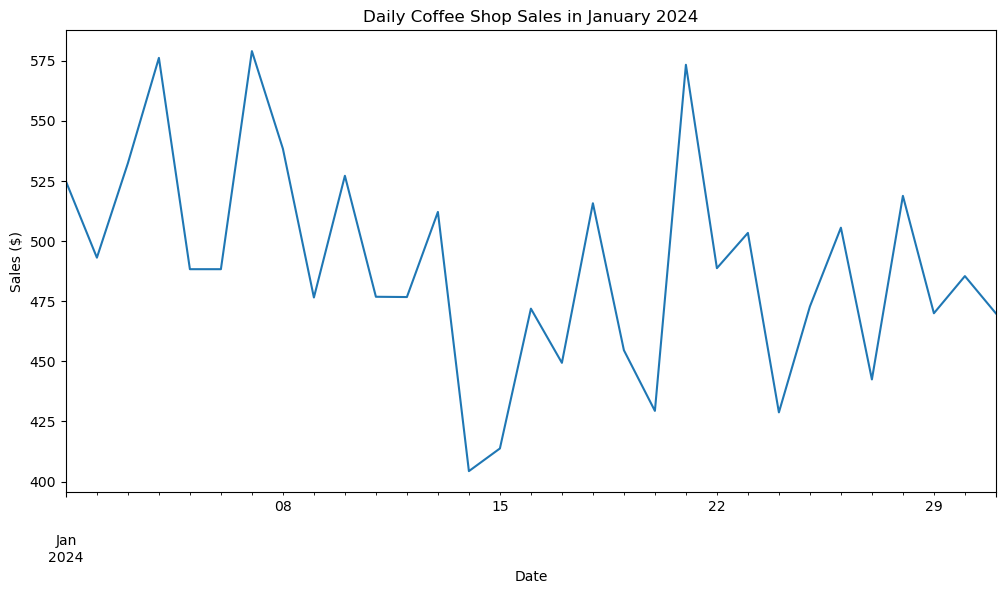

In [267]:
import matplotlib.pyplot as plt
ds.plot(title='Daily Coffee Shop Sales in January 2024', figsize=(12,6))
plt.ylabel('Sales ($)')
plt.xlabel("Date")
plt.show()

In [268]:
# Sample data for 3 products' daily sales
data = {
    'Coffee': [500, 520, 480, 510, 495],
    'Tea': [300, 310, 295, 305, 290],
    'Pastries': [150, 170, 140, 160, 155]
}

df = pd.DataFrame(data)
df

,Coffee,Tea,Pastries
0,500,300,150
1,520,310,170
2,480,295,140
3,510,305,160
4,495,290,155


In [269]:
# covariance of all items
df.cov()

,Coffee,Tea,Pastries
Coffee,230.0,100.0,162.5
Tea,100.0,62.5,62.5
Pastries,162.5,62.5,125.0


In [270]:
# correlation of all items
df.corr()

,Coffee,Tea,Pastries
Coffee,1.000000,0.834058,0.958373
Tea,0.834058,1.000000,0.707107
Pastries,0.958373,0.707107,1.000000


In [271]:
# covariance of two spaecific items
df['Coffee'].cov(df['Tea'])

np.float64(100.0)

In [272]:
# correlation of two spaecific items
df['Coffee'].corr(df['Tea'])

np.float64(0.8340576562282991)

In [273]:
# using corrwith methode to compute correlation
df.corrwith(df['Tea'])

Coffee      0.834058
Tea         1.000000
Pastries    0.707107
dtype: float64

In [274]:
# open a file to read
price = pd.read_pickle('yahoo_price.pkl')
volume = pd.read_pickle('yahoo_volume.pkl')

In [275]:
price.head()    # display the first 5 rows of the data

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,27.990226,313.062468,113.304536,25.884104
2010-01-05,28.038618,311.683844,111.935822,25.892466
2010-01-06,27.592626,303.826685,111.208683,25.733566
2010-01-07,27.541619,296.753749,110.823732,25.465944
2010-01-08,27.724725,300.709808,111.935822,25.641571


In [276]:
volume.head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,123432400,3927000,6155300,38409100
2010-01-05,150476200,6031900,6841400,49749600
2010-01-06,138040000,7987100,5605300,58182400
2010-01-07,119282800,12876600,5840600,50559700
2010-01-08,111902700,9483900,4197200,51197400


In [277]:
# compute the percent changes of price
returns = price.pct_change()
returns.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2016-10-17,-0.000680,0.001837,0.002072,-0.003483
2016-10-18,-0.000681,0.019616,-0.026168,0.007690
2016-10-19,-0.002979,0.007846,0.003583,-0.002255
2016-10-20,-0.000512,-0.005652,0.001719,-0.004867
2016-10-21,-0.003930,0.003011,-0.012474,0.042096


In [278]:
# let's see the relation between two varibles using correlation and covariance
# let's start with correlation
returns['AAPL'].corr(returns['GOOG'])

np.float64(0.4079185761679699)

In [279]:
# compute covariance
returns['AAPL'].cov(returns['GOOG'])

np.float64(0.00010745748920152607)

In [280]:
# DataFrame’s corr and cov methods, on the other hand, return a full correlation or
# covariance matrix as a DataFrame, respectively:
returns.cov()

,AAPL,GOOG,IBM,MSFT
AAPL,0.000277,0.000107,0.000078,0.000095
GOOG,0.000107,0.000251,0.000078,0.000108
IBM,0.000078,0.000078,0.000146,0.000089
MSFT,0.000095,0.000108,0.000089,0.000215


In [281]:
returns.corr()

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.407919,0.386817,0.389695
GOOG,0.407919,1.000000,0.405099,0.465919
IBM,0.386817,0.405099,1.000000,0.499764
MSFT,0.389695,0.465919,0.499764,1.000000


In [282]:
# Using DataFrame’s corrwith method, we can compute pair-wise correlations
# between a DataFrame’s columns or rows with another Series or DataFrame. Passing a
# Series returns a Series with the correlation value computed for each column:
returns.corrwith(returns['IBM'])

AAPL    0.386817
GOOG    0.405099
IBM     1.000000
MSFT    0.499764
dtype: float64

In [283]:
# Passing a DataFrame computes the correlations of matching column names. Here, I
# compute correlations of percent changes with volume:
returns.corrwith(volume)

AAPL   -0.075565
GOOG   -0.007067
IBM    -0.204849
MSFT   -0.092950
dtype: float64

## Unique Values, Value Counts, and Membership

In [284]:
s = pd.Series(["c", "a", "d", "a", "a", "b", "b", "c", "c"])
s

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [285]:
# Unigue function
# gives an array of the unique values in a series
uniques = s.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [286]:
# number of unique values
s.nunique()

4

In [287]:
# value_counts function
# computes a series containing value frequencies
s.value_counts()

c    3
a    3
b    2
d    1
Name: count, dtype: int64

In [288]:
# The Series is sorted by value in descending order as a convenience. value_counts is
# also available as a top-level pandas method that can be used with NumPy arrays or
# other Python sequences
pd.Series(s.to_numpy()).value_counts()

c    3
a    3
b    2
d    1
Name: count, dtype: int64

In [289]:
s

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [290]:
# membership checking using isin method
mask = s.isin(['c'])
mask

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8     True
dtype: bool

In [291]:
# accessing the item with its lables
s[mask]

0    c
7    c
8    c
dtype: object

In [292]:
# Related to isin is the Index.get_indexer method, which gives you an index array
# from an array of possibly nondistinct values into another array of distinct values:
to_match = pd.Series(["c", "a", "b", "b", "c", "a"])
unique_vals = pd.Series(["c", "b", "a"])
indices = pd.Index(unique_vals).get_indexer(to_match)
indices

array([0, 2, 1, 1, 0, 2])

In [293]:
# value_counts in dataframe
data = {
    'Fruit': ['Apple', 'Banana', 'Apple', 'Orange', 'Banana', 'Banana', 'Apple', 'Orange', 'Grape', 'Apple'],
    'Color': ['Red', 'Yellow', 'Red', 'Orange', 'Yellow', 'Yellow', 'Red', 'Orange', 'Red', 'Red']
}
df = pd.DataFrame(data)
df

,Fruit,Color
0,Apple,Red
1,Banana,Yellow
2,Apple,Red
3,Orange,Orange
4,Banana,Yellow
5,Banana,Yellow
6,Apple,Red
7,Orange,Orange
8,Grape,Red
9,Apple,Red


In [294]:
# let's count each fruit
df['Fruit'].value_counts()

Fruit
Apple     4
Banana    3
Orange    2
Grape     1
Name: count, dtype: int64

In [295]:
# count each color
df['Color'].value_counts()

Color
Red       5
Yellow    3
Orange    2
Name: count, dtype: int64

In [296]:
df.value_counts()

Fruit   Color 
Apple   Red       4
Banana  Yellow    3
Orange  Orange    2
Grape   Red       1
Name: count, dtype: int64

In [297]:
# Simple real world practice
# Sample data
data = {
    'Customer_ID': np.arange(1, 21),
    'Product': np.random.choice(['Laptop', 'Smartphone', 'Headphones', 'Tablet', 'Smartwatch'], 20),
    'Category': np.random.choice(['Electronics', 'Accessories'], 20),
    'Payment_Method': np.random.choice(['Credit Card', 'PayPal', 'Bank Transfer', 'Crypto'], 20),
    'Country': np.random.choice(['USA', 'Canada', 'UK', 'Germany', 'Australia'], 20)
}

# Create DataFrame
df = pd.DataFrame(data)
df

,Customer_ID,Product,Category,Payment_Method,Country
0,1,Tablet,Accessories,Crypto,USA
1,2,Smartwatch,Electronics,Credit Card,Germany
2,3,Headphones,Accessories,Crypto,Canada
3,4,Laptop,Electronics,Crypto,USA
4,5,Tablet,Electronics,Crypto,Australia
5,6,Smartphone,Accessories,Bank Transfer,UK
6,7,Tablet,Accessories,Bank Transfer,Germany
7,8,Smartphone,Electronics,Bank Transfer,UK
8,9,Smartphone,Accessories,Credit Card,UK
9,10,Tablet,Accessories,Crypto,USA


In [298]:
# Count of Products Sold:
df['Product'].value_counts()

Product
Tablet        7
Smartphone    7
Smartwatch    3
Laptop        2
Headphones    1
Name: count, dtype: int64

In [299]:
# Count of Payment Method:
df['Payment_Method'].value_counts()

Payment_Method
Bank Transfer    7
Crypto           6
Credit Card      5
PayPal           2
Name: count, dtype: int64

In [300]:
# Most Common Country for Orders:
df['Country'].value_counts()

Country
UK           6
USA          5
Canada       4
Australia    3
Germany      2
Name: count, dtype: int64

In [301]:
# Count with Normalized Values (Percentages):
df['Product'].value_counts(normalize=True)

Product
Tablet        0.35
Smartphone    0.35
Smartwatch    0.15
Laptop        0.10
Headphones    0.05
Name: proportion, dtype: float64

In [302]:
# Combining Multiple Columns:
df.groupby(['Product', 'Payment_Method']).size()

Product     Payment_Method
Headphones  Crypto            1
Laptop      Credit Card       1
            Crypto            1
Smartphone  Bank Transfer     3
            Credit Card       3
            PayPal            1
Smartwatch  Bank Transfer     1
            Credit Card       1
            Crypto            1
Tablet      Bank Transfer     3
            Crypto            3
            PayPal            1
dtype: int64

In [303]:
# Count Only Orders from the USA:
df[df['Country'] == 'USA']['Product'].value_counts()

Product
Tablet    4
Laptop    1
Name: count, dtype: int64

In [304]:
# Top 2 Most Frequent Products
df['Product'].value_counts().head(2)

Product
Tablet        7
Smartphone    7
Name: count, dtype: int64